In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'dummy-most_frequent',
  'Test Dataset': 'IPTC-test',
  'Macro F1': 0.006217923410975128,
  'Micro F1': 0.05580159433126661,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'hr': {'Macro F1': 0.006493506493506493,
    'Micro F1': 0.058419243986254296},
   'ca': {'Macro F1': 0.005861419300816412, 'Micro F1': 0.052434456928838954},
   'sl': {'Macro F1': 0.006688963210702341, 'Micro F1': 0.06028368794326241},
   'el': {'Macro F1': 0.005804953560371517, 'Micro F1': 0.05190311418685121}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'IPTC-test',
  'Macro F1': 0.06319414542550471,
  'Micro F1': 0.07263064658990256,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'hr': {'Macro F1': 0.05651180911098832,
    'Micro F1': 0.07216494845360824},
   'ca': {'Macro F1': 0.055563194742721714, 'Micro F1': 0.06367041198501873},
   'sl': {'Macro F1': 0.05266489526230521, 'Micro F1': 0.05319148936170213},
   'el': {'Macro F1': 0.0773111606

In [3]:
results_iptc = []

for x in results:
	cur_result = {}
	cur_result["Model"] = x["Model"]
	cur_result[f"Slovenian (macro-F1)"] = x['Language-Specific Scores']["sl"]["Macro F1"]
	cur_result[f"Slovenian (micro-F1)"] = x['Language-Specific Scores']["sl"]["Micro F1"]
	cur_result[f"Croatian (macro-F1)"] = x['Language-Specific Scores']["hr"]["Macro F1"]
	cur_result[f"Croatian (micro-F1)"] = x['Language-Specific Scores']["hr"]["Micro F1"]
	results_iptc.append(cur_result)

results_df = pd.DataFrame(results_iptc)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,dummy-most_frequent,0.006689,0.060284,0.006494,0.058419
1,dummy-stratified,0.052665,0.053191,0.056512,0.072165
2,COMPLEMENTNB,0.210720,0.255319,0.231104,0.312715
3,SVC,0.421124,0.425532,0.398586,0.429553
4,deepseek-r1:14b,0.384765,0.361314,0.400958,0.390158
5,llama3.3:latest,0.614337,0.609626,0.609558,0.611399
6,gpt-3.5-turbo-0125,0.682264,0.670213,0.587377,0.577320
7,gpt-4o-2024-08-06,0.766934,0.765957,0.740869,0.735395
8,gpt-4o-mini-2024-07-18,0.730173,0.723404,0.731696,0.718213
9,IPTC XLM-R classifier,0.764784,0.758865,0.733725,0.728522


In [4]:
results_df = results_df.sort_values(by="Croatian (macro-F1)", ascending=False).round(3)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
13,gpt-5,0.736,0.727,0.749,0.746
17,google/gemini-2.5-flash,0.795,0.787,0.747,0.742
7,gpt-4o-2024-08-06,0.767,0.766,0.741,0.735
9,IPTC XLM-R classifier,0.765,0.759,0.734,0.729
8,gpt-4o-mini-2024-07-18,0.730,0.723,0.732,0.718
11,gpt-5-mini-2025-08-07,0.749,0.741,0.711,0.704
16,mistralai/mistral-medium-3.1,0.761,0.762,0.700,0.701
10,gemma3:27b,0.693,0.683,0.695,0.692
14,qwen3:32b,0.656,0.663,0.677,0.674
12,gpt-5-nano-2025-08-07,0.730,0.713,0.661,0.653


In [5]:
print(results_df.to_markdown())

|    | Model                        |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |
|---:|:-----------------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|
| 13 | gpt-5                        |                  0.736 |                  0.727 |                 0.749 |                 0.746 |
| 17 | google/gemini-2.5-flash      |                  0.795 |                  0.787 |                 0.747 |                 0.742 |
|  7 | gpt-4o-2024-08-06            |                  0.767 |                  0.766 |                 0.741 |                 0.735 |
|  9 | IPTC XLM-R classifier        |                  0.765 |                  0.759 |                 0.734 |                 0.729 |
|  8 | gpt-4o-mini-2024-07-18       |                  0.73  |                  0.723 |                 0.732 |                 0.718 |
| 11 | gpt-5-mini-2025-08-07        |           

In [6]:
# Save the results

results_df.to_json("results.json", orient="records", lines=True)


## Plot a bar plot

In [7]:
results_df = pd.read_json("results.json", orient="records", lines=True)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,gpt-5,0.736,0.727,0.749,0.746
1,google/gemini-2.5-flash,0.795,0.787,0.747,0.742
2,gpt-4o-2024-08-06,0.767,0.766,0.741,0.735
3,IPTC XLM-R classifier,0.765,0.759,0.734,0.729
4,gpt-4o-mini-2024-07-18,0.730,0.723,0.732,0.718
5,gpt-5-mini-2025-08-07,0.749,0.741,0.711,0.704
6,mistralai/mistral-medium-3.1,0.761,0.762,0.700,0.701
7,gemma3:27b,0.693,0.683,0.695,0.692
8,qwen3:32b,0.656,0.663,0.677,0.674
9,gpt-5-nano-2025-08-07,0.730,0.713,0.661,0.653


In [8]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "IPTC XLM-R classifier": "Fine-Tuned BERT-Like Model",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
	"gpt-5-mini-2025-08-07": "GPT-5-mini",
	"gpt-5": "GPT-5",
	"gpt-5-nano-2025-08-07": "GPT-5-Nano",
	"llama4:scout": "LLaMA 4 Scout",
	"qwen3:32b": "Qwen 3",
	'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
	'google/gemini-2.5-flash': "Gemini 2.5 Flash",
	'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
	'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
	'cohere/command-a': "Command A",
	"GaMS-27B-quantized": "GaMS-27B-Instruct (quantized)",
	"GaMS-27B": "GaMS-27B-Instruct",
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)


In [9]:
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,GPT-5,0.736,0.727,0.749,0.746
1,Gemini 2.5 Flash,0.795,0.787,0.747,0.742
2,GPT-4o,0.767,0.766,0.741,0.735
3,Fine-Tuned BERT-Like Model,0.765,0.759,0.734,0.729
4,GPT-4o-mini,0.730,0.723,0.732,0.718
5,GPT-5-mini,0.749,0.741,0.711,0.704
6,Mistral Medium 3.1,0.761,0.762,0.700,0.701
7,Gemma 3,0.693,0.683,0.695,0.692
8,Qwen 3,0.656,0.663,0.677,0.674
9,GPT-5-Nano,0.730,0.713,0.661,0.653


In [10]:
results_df = results_df[results_df["Model"].isin(['Fine-Tuned BERT-Like Model', 'Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)',"GaMS-27B-Instruct", "GaMS-27B-Instruct (quantized)"])]

results_df.sort_values(by="Model", ascending=True)

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
13,DeepSeek-R1-Distill,0.385,0.361,0.401,0.390
19,Dummy (Frequent),0.007,0.060,0.006,0.058
3,Fine-Tuned BERT-Like Model,0.765,0.759,0.734,0.729
11,GPT-3.5-Turbo,0.682,0.670,0.587,0.577
2,GPT-4o,0.767,0.766,0.741,0.735
0,GPT-5,0.736,0.727,0.749,0.746
15,GaMS-27B-Instruct,0.315,0.312,0.276,0.265
16,GaMS-27B-Instruct (quantized),0.294,0.295,0.258,0.244
1,Gemini 2.5 Flash,0.795,0.787,0.747,0.742
7,Gemma 3,0.693,0.683,0.695,0.692


In [11]:
# Add a column with averages

columns_to_drop = []
for column in results_df.columns.to_list():
	if "macro-F1" not in column:
		columns_to_drop.append(column)

print(columns_to_drop)


results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)
results_df

['Model', 'Slovenian (micro-F1)', 'Croatian (micro-F1)']


/tmp/ipykernel_2809183/3701238600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)


,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Average (macro-F1)
0,GPT-5,0.736,0.727,0.749,0.746,0.7425
1,Gemini 2.5 Flash,0.795,0.787,0.747,0.742,0.7710
2,GPT-4o,0.767,0.766,0.741,0.735,0.7540
3,Fine-Tuned BERT-Like Model,0.765,0.759,0.734,0.729,0.7495
6,Mistral Medium 3.1,0.761,0.762,0.700,0.701,0.7305
7,Gemma 3,0.693,0.683,0.695,0.692,0.6940
8,Qwen 3,0.656,0.663,0.677,0.674,0.6665
10,LLaMA 3.3,0.614,0.610,0.610,0.611,0.6120
11,GPT-3.5-Turbo,0.682,0.670,0.587,0.577,0.6345
13,DeepSeek-R1-Distill,0.385,0.361,0.401,0.390,0.3930


<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

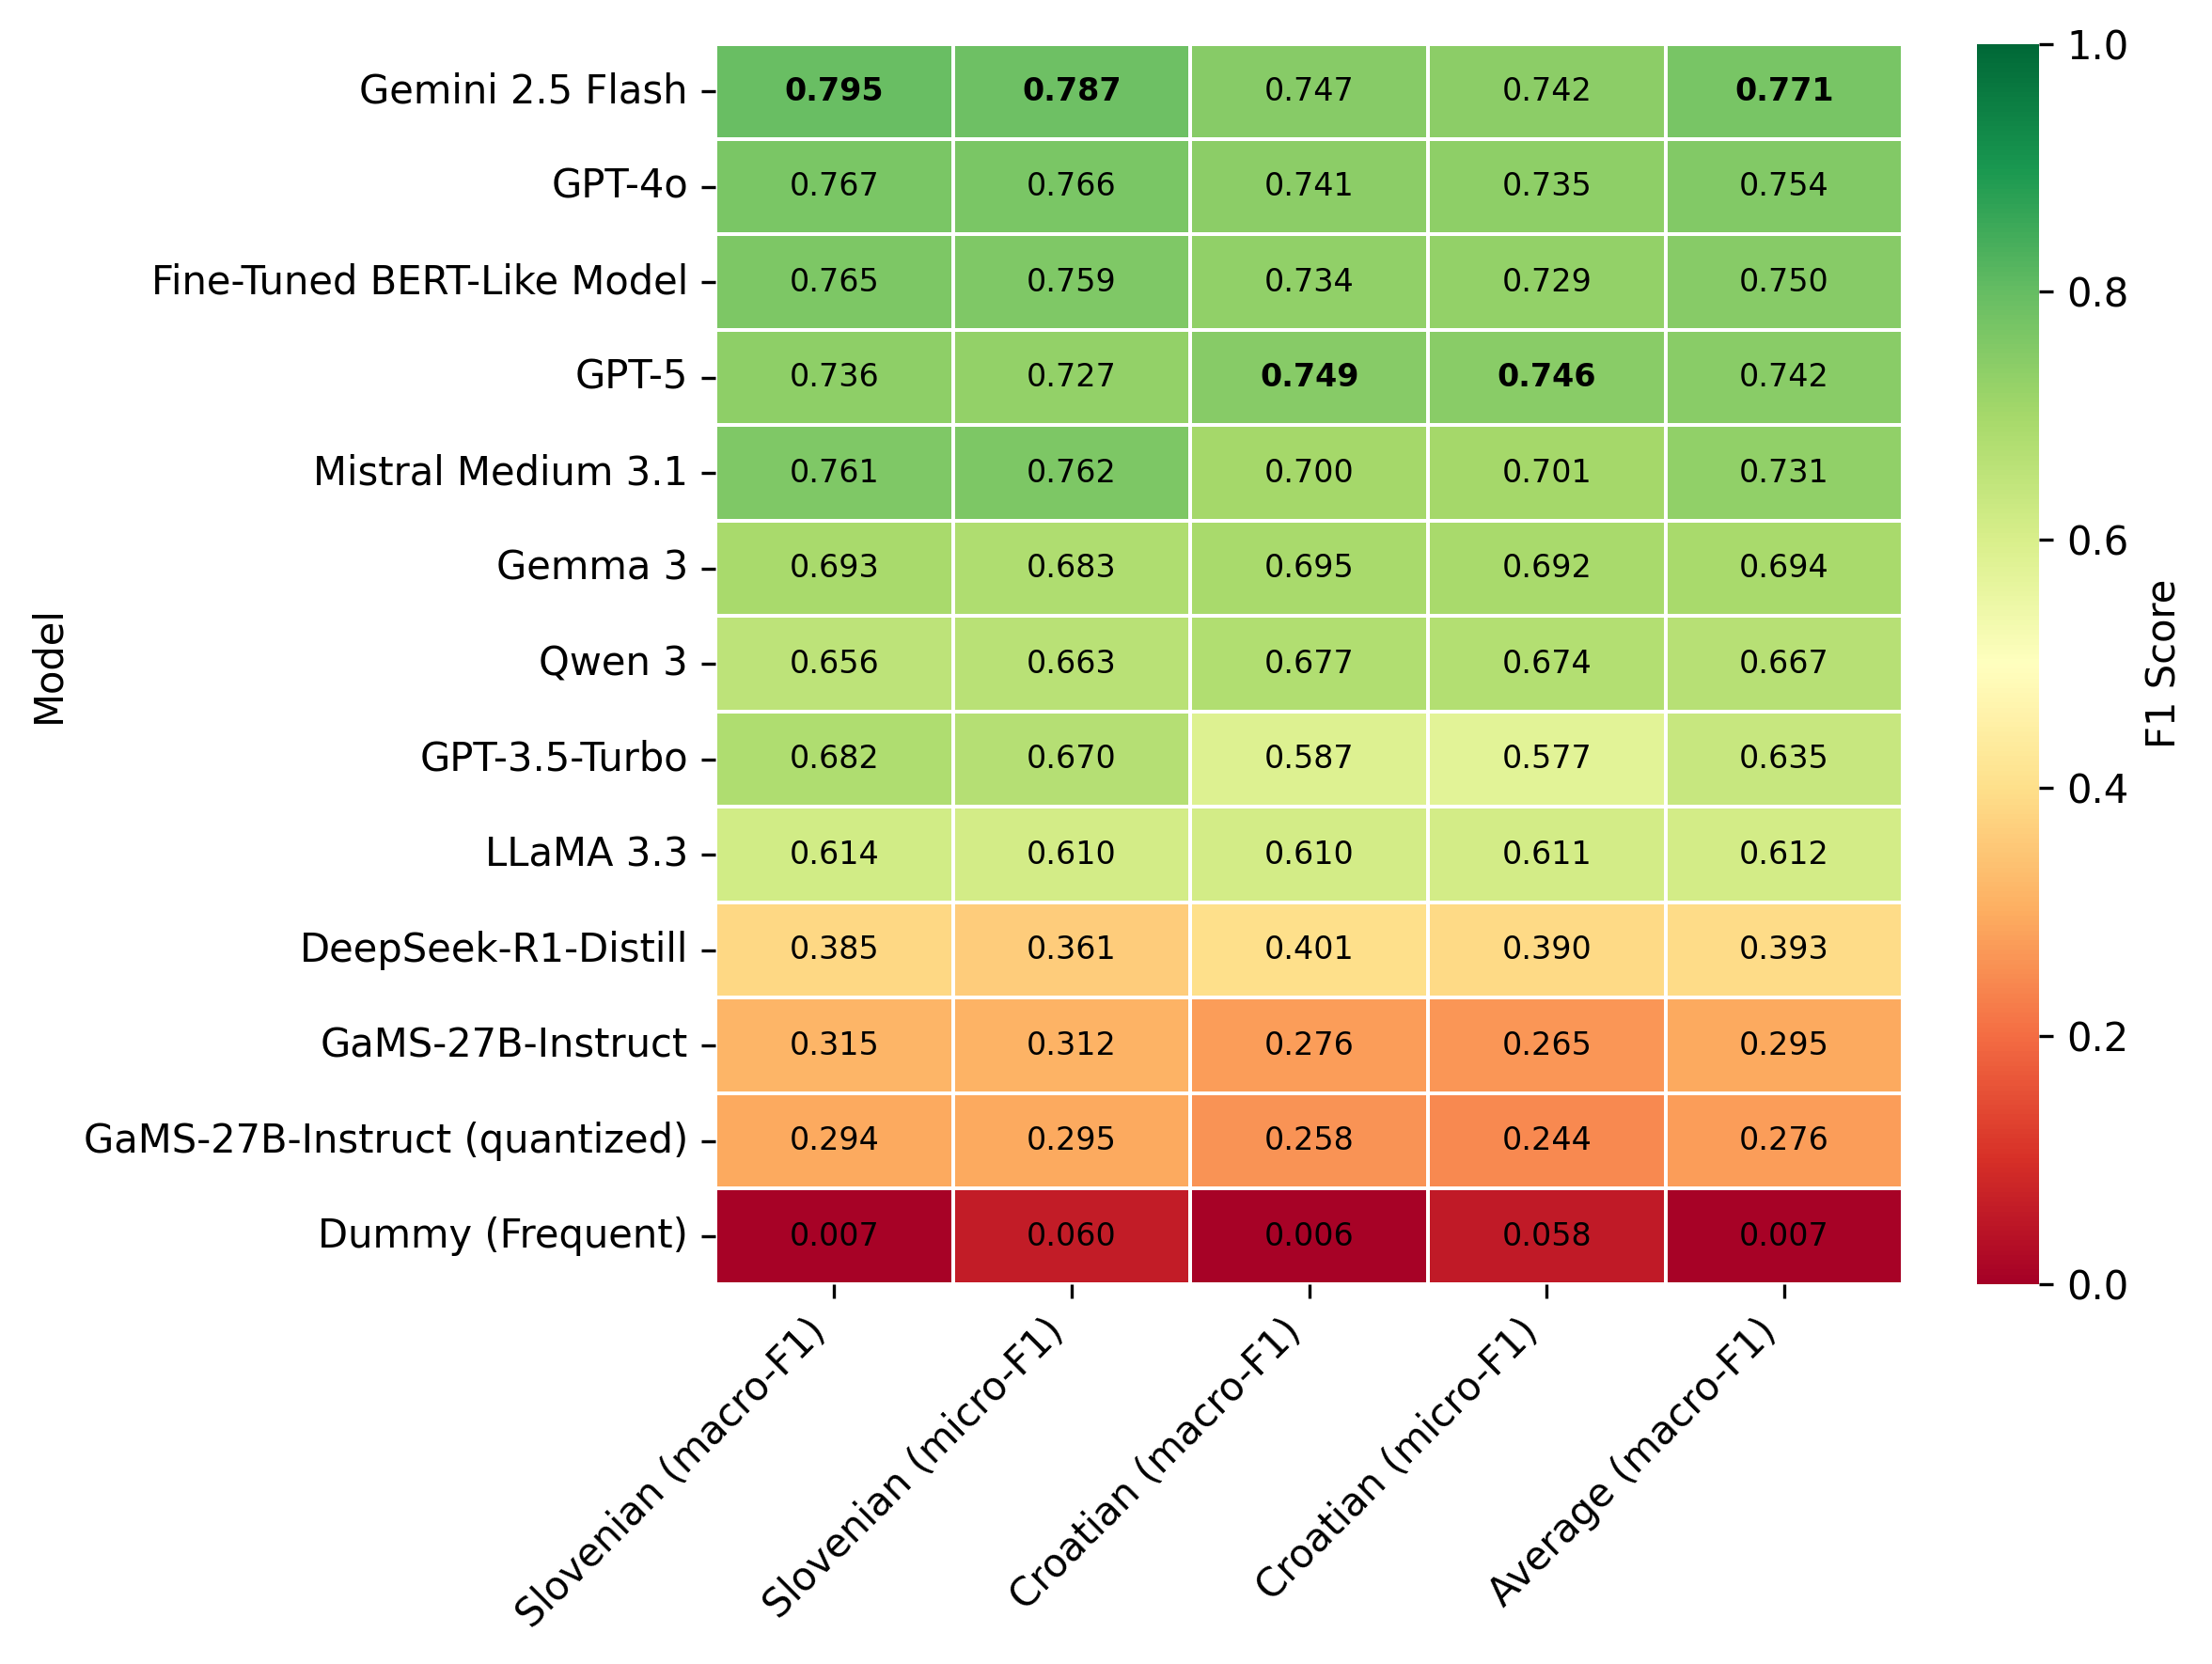

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=300)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Average (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("topic-classification-results.png", dpi=300)
plt


In [13]:
# Rename rule
def create_rename_dict(df):
	columns = df.columns.to_list()
	new_dict = {}
	for column in columns:
		if "macro-F1" in column:
			new_dict[column] = column.replace(" (macro-F1)", "")
	return new_dict

rename_dict = create_rename_dict(results_df)
print(rename_dict)

results_df.rename(columns=rename_dict, inplace=True)
results_df

{'Slovenian (macro-F1)': 'Slovenian', 'Croatian (macro-F1)': 'Croatian', 'Average (macro-F1)': 'Average'}


/tmp/ipykernel_2809183/2036690812.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns=rename_dict, inplace=True)


,Model,Slovenian,Slovenian (micro-F1),Croatian,Croatian (micro-F1),Average
0,GPT-5,0.736,0.727,0.749,0.746,0.7425
1,Gemini 2.5 Flash,0.795,0.787,0.747,0.742,0.7710
2,GPT-4o,0.767,0.766,0.741,0.735,0.7540
3,Fine-Tuned BERT-Like Model,0.765,0.759,0.734,0.729,0.7495
6,Mistral Medium 3.1,0.761,0.762,0.700,0.701,0.7305
7,Gemma 3,0.693,0.683,0.695,0.692,0.6940
8,Qwen 3,0.656,0.663,0.677,0.674,0.6665
10,LLaMA 3.3,0.614,0.610,0.610,0.611,0.6120
11,GPT-3.5-Turbo,0.682,0.670,0.587,0.577,0.6345
13,DeepSeek-R1-Distill,0.385,0.361,0.401,0.390,0.3930


In [14]:
results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)", "Fine-Tuned BERT-Like Model", 'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model", 'Croatian (micro-F1)', 'Slovenian (micro-F1)', 'Average']).transpose()

results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash','Gemma 3', 'LLaMA 3.3', 'Qwen 3', "GaMS-27B-Instruct"]]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Gemini 2.5 Flash,Gemma 3,LLaMA 3.3,Qwen 3,GaMS-27B-Instruct
Slovenian,0.682,0.767,0.736,0.761,0.795,0.693,0.614,0.656,0.315
Croatian,0.587,0.741,0.749,0.700,0.747,0.695,0.610,0.677,0.276


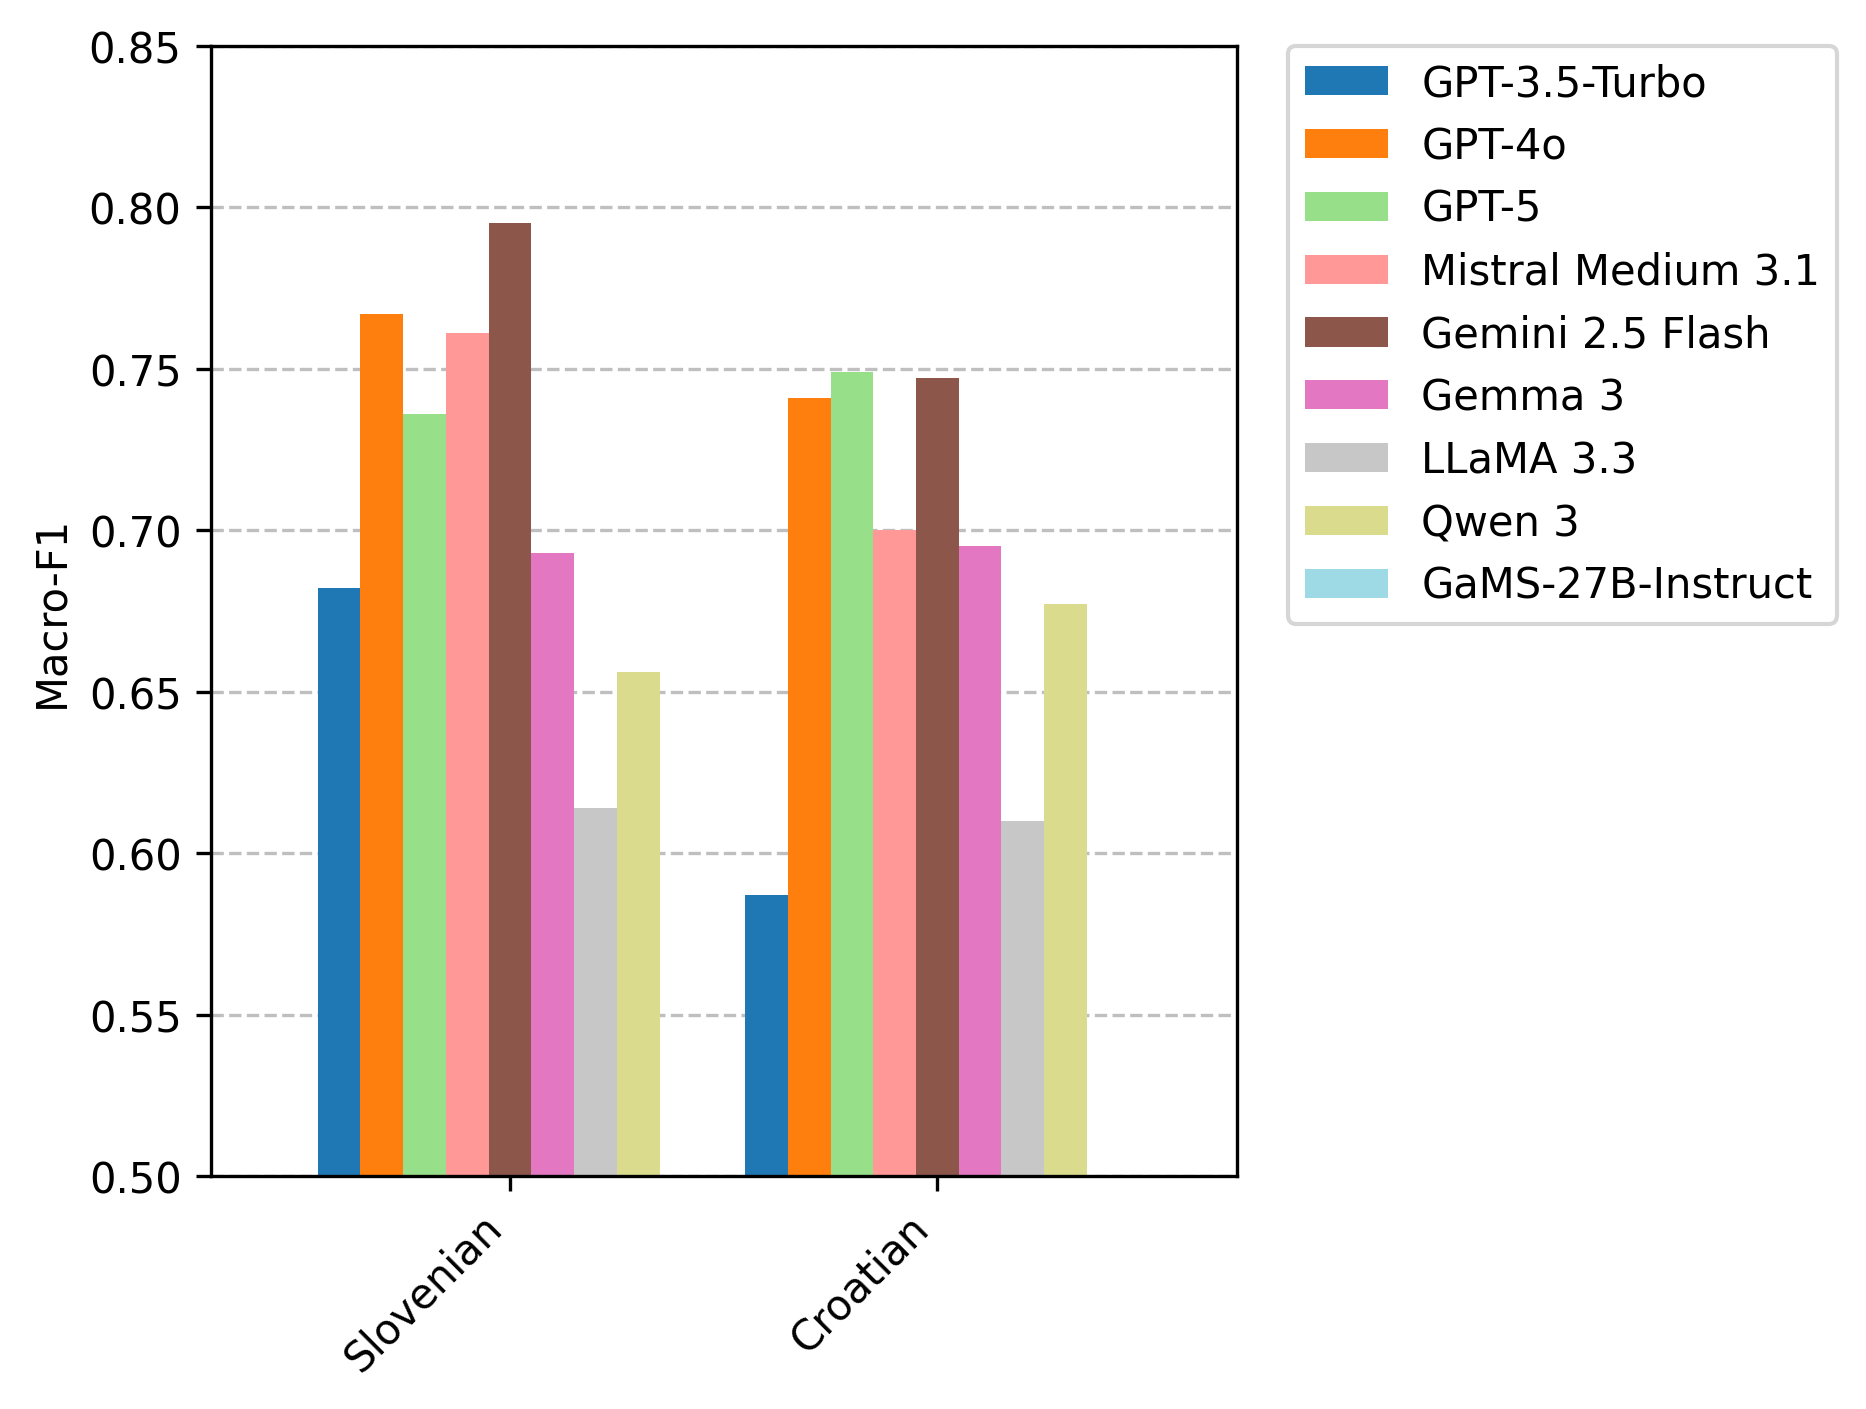

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.5, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Macro-F1")

# Add horizontal grid lines every 0.05
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(round(ymin, 2), round(ymax + 0.05, 2), 0.05))  # steps of 0.05
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("topic_gpt_comparison.png", dpi=300)
plt.show()


## Analyze percentage of Mix labels

In [16]:
import os
import json
import pandas as pd

In [17]:
os.chdir("..")

In [18]:
submission_folder = "systems/OpenAI-GPT/submissions"

In [19]:
def add_predictions_to_dataset(results,dataset_name="IPTC-test"):
	"""The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
	"""
	# Load the test datasets from the GitHub repositories (access to them is obtained by request to the AGILE repository owner)

	test_df = pd.read_json("datasets/IPTC-top-test/IPTC-top-test.jsonl", lines=True)
	print(test_df.shape)

	test_df.rename(columns={"label": "labels", "lang": "language"}, inplace=True)

	# Extract predictions
	y_pred = results["predictions"][0]["predictions"]
	test_df["y_pred"] = y_pred

	return test_df

In [20]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

['submission-gpt-5-mini-2025-08-07-IPTC-test.json',
 'submission-gpt-5-nano-2025-08-07-IPTC-test.json',
 'submission-gpt-5-IPTC-test.json',
 'submission-gpt-3.5-turbo-0125-IPTC-test.json',
 'submission-gpt-4o-2024-08-06-IPTC-test.json',
 'submission-gpt-4o-mini-2024-07-18-IPTC-test.json']

In [21]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)

		# Get information on the dataset and the model
		model = results["system"]

		dataset_name = results["predictions"][0]["test"]

		test_df = add_predictions_to_dataset(results)
			
		print(model)
		print(dataset_name)
		print(test_df["y_pred"].value_counts(normalize=True))

(1129, 5)
gpt-5-mini-2025-08-07
IPTC-test
y_pred
science and technology                       0.074402
politics                                     0.070859
environment                                  0.069973
sport                                        0.069088
arts, culture, entertainment and media       0.066430
labour                                       0.064659
economy, business and finance                0.062002
health                                       0.062002
education                                    0.061116
crime, law and justice                       0.059345
human interest                               0.058459
society                                      0.052259
lifestyle and leisure                        0.050487
religion                                     0.049601
conflict, war and peace                      0.043401
weather                                      0.043401
disaster, accident and emergency incident    0.042516
Name: proportion, dtype: float64
